<a href="https://colab.research.google.com/github/divyadeep1/BTP/blob/master/Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.text import *
import pandas as pd
import numpy as np
from google.colab import files

path = "data/"

In [0]:
!ls data

test.csv  test.ft.txt  train.csv  train.ft.txt


In [0]:
from google.colab import files
#files.upload()

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d bittlingmayer/amazonreviews

In [0]:
!unzip amazonreviews.zip

In [0]:
!mkdir data
!bzip2 -d test.ft.txt.bz2
!bzip2 -d train.ft.txt.bz2

In [0]:
!cp test.ft.txt data/
!cp train.ft.txt data/
!ls data/

In [0]:
with open ('data/train.ft.txt', 'r') as f:
  print(f.readline())

In [0]:
train_file_lines = open('data/train.ft.txt').readlines()
test_file_lines = open('data/test.ft.txt').readlines()

In [0]:
len(train_file_lines)

3600000

In [0]:
train_sentences = [x.split(" ",1)[1] for x in train_file_lines]
train_labels = [0 if x.split(" ",1)[0]=='__label__1' else 1 for x in train_file_lines]

test_sentences = [x.split(" ",1)[1] for x in test_file_lines]
test_labels = [0 if x.split(" ",1)[0]=='__label__1' else 1 for x in test_file_lines]

In [0]:
len(train_sentences)

3600000

In [0]:
print(train_sentences[:5], train_labels[:5], test_sentences[:5], test_labels[:5])

['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n', "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n", 'Amazing!: This soundtrack is my favorite music of a

In [0]:
data_trn = pd.DataFrame({'text' : train_sentences, 'target' : train_labels})
data_tst = pd.DataFrame({'text' : test_sentences, 'target' : test_labels})

In [0]:
data_trn.shape

(3600000, 2)

In [0]:
data_tst.head()

,target,text
0,1,Great CD: My lovely Pat has one of the GREAT v...
1,1,One of the best game music soundtracks - for a...
2,0,Batteries died within a year ...: I bought thi...
3,1,"works fine, but Maha Energy is better: Check o..."
4,1,Great for the non-audiophile: Reviewed quite a...


In [0]:
del train_file_lines, test_file_lines

In [0]:
import gc
gc.collect()

In [0]:
data_trn.to_csv("data/train.csv", index=False)
data_tst.to_csv("data/test.csv", index=False)

In [0]:
!ls data/

test.csv  test.ft.txt  train.csv  train.ft.txt


In [0]:
files.download("data/train.csv")

In [0]:
files.download("data/test.csv")

In [0]:
data_trn = pd.read_csv("data/train.csv")
data_tst = pd.read_csv("data/test.csv")

In [0]:
data_trn_min = data_trn.sample(n=40000, random_state=1)
data_tst_min = data_tst.sample(n=15000, random_state=1)

In [0]:
data_lm = TextLMDataBunch.from_df(path, train_df=data_trn_min, valid_df=data_tst_min)

In [0]:
data_lm.show_batch()

idx,text
0,", sentence completion , and oral reading . xxmaj parent participation is encouraged and a "" certificate of accomplishment "" is included at the end of the book xxmaj this book is excellent source material for both teachers and parents , but particularly for parents who wish to help their child at home with basic reading skills . \n xxbos xxmaj stay far , far away . : i"
1,"once i begin reading it , but this book i had to put down . xxmaj it was more like a bedtime story opposed to an interesting read . i definitely would not xxunk this book to others . xxmaj honestly , i have read other xxmaj oprah 's book club picks and this is the first one i did not like at all . \n xxbos xxmaj never"
2,"stick to the basics . xxmaj you ca n't go wrong with xxmaj cinderella . \n xxbos xxmaj after the xxmaj dancing xxmaj days xxmaj by xxmaj margaret xxup i. xxmaj xxunk : xxmaj after the xxmaj dancing xxmaj days is a heartwarming story that accurately depicts historical events . xxmaj the author gives readers an accurate picture of what the war was like , how the soldiers felt"
3,"seasons ! \n xxbos xxmaj avoid this product ! : xxmaj please read the editorial review . xxmaj pay attention to the product limitations and to the fact that "" recording industry is really pushing the xxunk xxunk not buy products witch limits your rights to use music , that you paid for , the way you want . xxmaj buy xxmaj archos or other products which are open"
4,"has nothing to do with another documentary about her life and career released more than 5 years ago . xxmaj very unfortunately , that good documentary is not available for sale . \n xxbos xxmaj this xxmaj monitor is a xxup nightmare ! : xxmaj just as the first reviewer on this page - this monitor is horrible ! xxmaj the batteries have xxup never gone out at any"


In [0]:
data_lm.save()

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


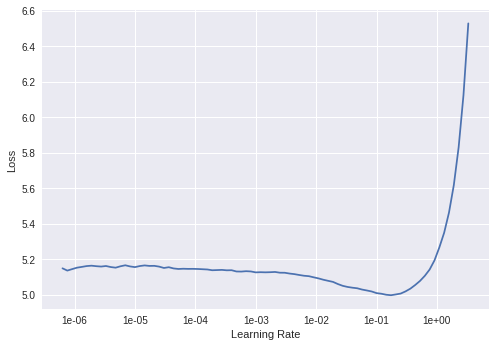

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.163480,3.964901,0.294187,10:19


In [0]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.100439,3.980674,0.290503,10:17
1,3.889692,3.912781,0.298177,10:18


In [0]:
learn.save('lm-3e')

In [0]:
!ls data/models/

lm-3e.pth  tmp.pth


In [0]:
files.download("data/models/lm-3e.pth")

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 47852, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
learn.save_encoder('tuned')

In [0]:
data = TextClasDataBunch.from_df(path, train_df=data_trn_min, valid_df=data_tst_min)

In [0]:
nn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.5)
nn.load_encoder("tuned")

In [0]:
nn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


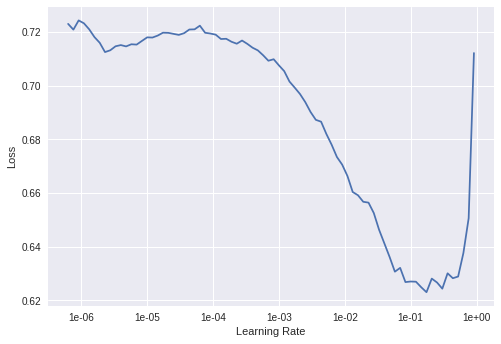

In [0]:
nn.recorder.plot()

In [0]:
nn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.493728,0.346361,0.855533,03:52
1,0.474372,0.338475,0.861600,03:42


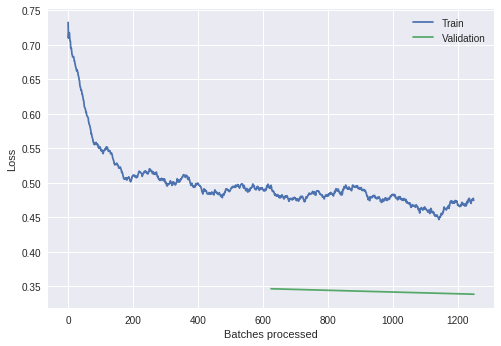

In [0]:
nn.recorder.plot_losses()

In [0]:
nn.predict("""Chemistry is tough. Can't handle it anymore. Please save me.""")

(Category 0, tensor(0), tensor([0.7045, 0.2955]))